In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Emissions from Burning of crop residues
https://www.fao.org/faostat/en/#data/GB

Data: Greenhouse Gas (GHG) emissions from burning crop residues consist of methane (CH4) and nitrous oxide (N2O) gases produced by the combustion of a percentage of crop residues burnt on-site. The mass of fuel available for burning should be estimated taking into account the fractions removed before burning due to animal consumption, decay in the field, and use in other sectors (e.g., biofuel, domestic livestock feed, building materials, etc.).

In [2]:
burning_data = pd.read_csv('Cereal_Normalized_Burning Crop Residues.csv', encoding='latin-1')


<ipython-input-2-3e51e351ed41>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  burning_data = pd.read_csv('Cereal_Normalized_Burning Crop Residues.csv', encoding='latin-1')


In [3]:
burning_data.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1961,1961,3050,FAO TIER 1,tonnes,1508670.0,E,NaN
1,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1962,1962,3050,FAO TIER 1,tonnes,1553070.0,E,NaN
2,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1963,1963,3050,FAO TIER 1,tonnes,1553070.0,E,NaN
3,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1964,1964,3050,FAO TIER 1,tonnes,1565170.0,E,NaN
4,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1965,1965,3050,FAO TIER 1,tonnes,1561100.0,E,NaN


In [4]:
burning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161314 entries, 0 to 161313
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        161314 non-null  int64  
 1   Area Code (M49)  161314 non-null  object 
 2   Area             161314 non-null  object 
 3   Item Code        161314 non-null  int64  
 4   Item Code (CPC)  161314 non-null  object 
 5   Item             161314 non-null  object 
 6   Element Code     161314 non-null  int64  
 7   Element          161314 non-null  object 
 8   Year Code        161314 non-null  int64  
 9   Year             161314 non-null  int64  
 10  Source Code      161314 non-null  int64  
 11  Source           161314 non-null  object 
 12  Unit             161314 non-null  object 
 13  Value            161314 non-null  float64
 14  Flag             161314 non-null  object 
 15  Note             6112 non-null    object 
dtypes: float64(1), int64(6), object(9)
mem

In [5]:
burning_data.isna().sum()

Area Code               0
Area Code (M49)         0
Area                    0
Item Code               0
Item Code (CPC)         0
Item                    0
Element Code            0
Element                 0
Year Code               0
Year                    0
Source Code             0
Source                  0
Unit                    0
Value                   0
Flag                    0
Note               155202
dtype: int64

In [6]:
burning_data = burning_data.drop(['Area Code', 'Area Code (M49)', 'Item Code', 'Element Code','Item Code (CPC)', 'Year Code','Source Code', 'Source','Flag', 'Note'], axis=1)

In [7]:
unique_areas = burning_data['Area'].unique()
print(unique_areas)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'China, Hong Kong SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Ethiopia PDR' 'Fiji' 'Finland' 'France'
 'French Guyana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'G

In [8]:
unique_years = burning_data['Year'].unique()
print(unique_years)

[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2030 2050]


In [9]:
unique_item = burning_data['Item'].unique()
print(unique_item)

['All Crops' 'Maize (corn)' 'Rice' 'Sugar cane' 'Wheat']


In [10]:
unique_years = burning_data['Element'].unique()
print(unique_years)

['Biomass burned (dry matter)' 'Emissions (N2O)' 'Emissions (CH4)']


In [11]:
selected_area = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Republic of Korea', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Türkiye', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen']

selected_items = ['Rice']

burning_data = burning_data[burning_data['Area'].isin(selected_area)]
burning_data = burning_data[burning_data['Item'].isin(selected_items)]

burning_data = burning_data[burning_data['Year'] >= 1992]
burning_data = burning_data[burning_data['Year'] <= 2020]

burning_data = burning_data.reset_index(drop=True)
burning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     2799 non-null   object 
 1   Item     2799 non-null   object 
 2   Element  2799 non-null   object 
 3   Year     2799 non-null   int64  
 4   Unit     2799 non-null   object 
 5   Value    2799 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 131.3+ KB


In [12]:
burning_data.drop_duplicates()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Rice,Biomass burned (dry matter),1992,tonnes,96250.0000
1,Afghanistan,Rice,Biomass burned (dry matter),1993,tonnes,96250.0000
2,Afghanistan,Rice,Biomass burned (dry matter),1994,tonnes,99000.0000
3,Afghanistan,Rice,Biomass burned (dry matter),1995,tonnes,93500.0000
4,Afghanistan,Rice,Biomass burned (dry matter),1996,tonnes,96250.0000
...,...,...,...,...,...,...
2794,Viet Nam,Rice,Emissions (CH4),2016,kilotonnes,11.4861
2795,Viet Nam,Rice,Emissions (CH4),2017,kilotonnes,11.4472
2796,Viet Nam,Rice,Emissions (CH4),2018,kilotonnes,11.2426
2797,Viet Nam,Rice,Emissions (CH4),2019,kilotonnes,11.0655


In [13]:
# Convert units to kt
unit_conversion = {
    'tonnes': 0.001,      # 1 tonne (t) is 0.001 kt
    'kilotonnes': 1          # 1 kilotonne (kt) is 1 kt
}

# Apply the unit conversion to the "Value" column
burning_data['Value'] = burning_data.apply(lambda row: row['Value'] * unit_conversion[row['Unit']], axis=1)

# Update the "Unit" column to have the new common unit
burning_data['Unit'] = 'kilotonnes'

In [14]:
# Define GWP values for CH4 and N2O (for a 100-year time horizon)
gwp_ch4 = 25  # GWP for CH4
gwp_n2o = 298  # GWP for N2O

# Create a function to calculate CO2eq
def calculate_co2eq(row):
    if row['Element'] == 'Emissions (CH4)':
        return row['Value'] * gwp_ch4
    elif row['Element'] == 'Emissions (N2O)':
        return row['Value'] * gwp_n2o
    else:
        return None

# Apply the function to the DataFrame
burning_data['CO2eq'] = burning_data.apply(calculate_co2eq, axis=1)

# Display the updated DataFrame with CO2eq values
print(burning_data)

             Area  Item                      Element  Year        Unit  \
0     Afghanistan  Rice  Biomass burned (dry matter)  1992  kilotonnes   
1     Afghanistan  Rice  Biomass burned (dry matter)  1993  kilotonnes   
2     Afghanistan  Rice  Biomass burned (dry matter)  1994  kilotonnes   
3     Afghanistan  Rice  Biomass burned (dry matter)  1995  kilotonnes   
4     Afghanistan  Rice  Biomass burned (dry matter)  1996  kilotonnes   
...           ...   ...                          ...   ...         ...   
2794     Viet Nam  Rice              Emissions (CH4)  2016  kilotonnes   
2795     Viet Nam  Rice              Emissions (CH4)  2017  kilotonnes   
2796     Viet Nam  Rice              Emissions (CH4)  2018  kilotonnes   
2797     Viet Nam  Rice              Emissions (CH4)  2019  kilotonnes   
2798     Viet Nam  Rice              Emissions (CH4)  2020  kilotonnes   

        Value     CO2eq  
0     96.2500       NaN  
1     96.2500       NaN  
2     99.0000       NaN  
3     9

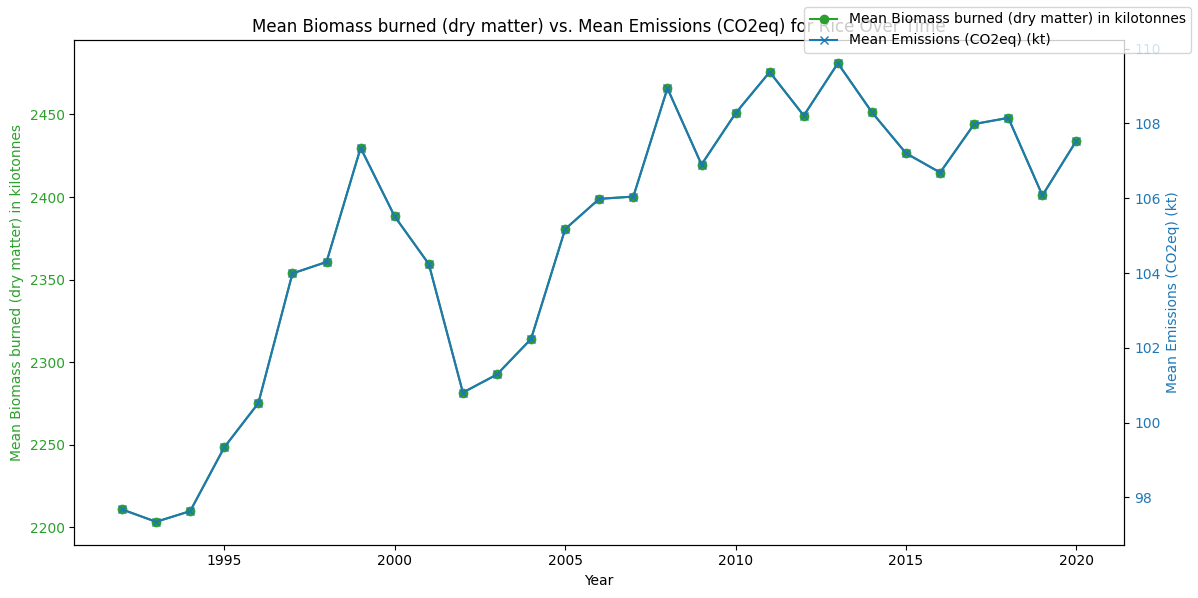

In [15]:
# Filter data for 'Biomass burned (dry matter)' and 'Emissions (CO2eq)'
biomass_data = burning_data[burning_data['Element'] == 'Biomass burned (dry matter)']
co2eq_data = burning_data[burning_data['Element'].isin(['Emissions (CH4)', 'Emissions (N2O)'])]

# Calculate the mean values for 'Biomass burned (dry matter)' and 'Emissions (CO2eq)' over the years
biomass_mean = biomass_data.groupby('Year')['Value'].mean()
co2eq_mean = co2eq_data.groupby('Year')['CO2eq'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the mean values for 'Biomass burned (dry matter)' on the first y-axis (left)
ax1.plot(biomass_mean.index, biomass_mean.values, color='tab:green', marker='o', label='Mean Biomass burned (dry matter) in kilotonnes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Biomass burned (dry matter) in kilotonnes', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Create a second y-axis (right) for 'Mean Emissions (CO2eq)'
ax2 = ax1.twinx()

# Plot the mean values for 'Emissions (CO2eq)' on the second y-axis (right)
ax2.plot(co2eq_mean.index, co2eq_mean.values, color='tab:blue', marker='x', label='Mean Emissions (CO2eq) (kt)')
ax2.set_ylabel('Mean Emissions (CO2eq) (kt)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Combine legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

# Display the combined legend
fig.legend(lines, labels, loc='upper right')

plt.title('Mean Biomass burned (dry matter) vs. Mean Emissions (CO2eq) for Rice Over Time')
fig.tight_layout()

plt.show()


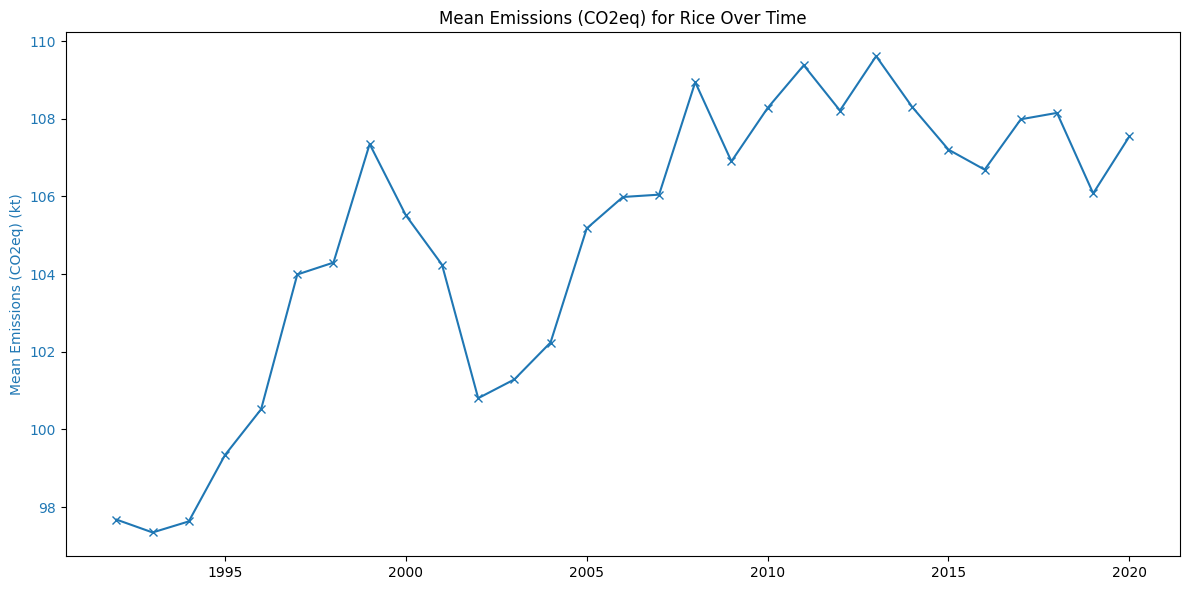

In [16]:
# Filter data for 'Emissions (CO2eq)'
co2eq_data = burning_data[burning_data['Element'].isin(['Emissions (CH4)', 'Emissions (N2O)'])]

# Calculate the mean values for 'Emissions (CO2eq)' over the years
co2eq_mean = co2eq_data.groupby('Year')['CO2eq'].mean()

fig, ax2 = plt.subplots(figsize=(12, 6))

# Plot the mean values for 'Emissions (CO2eq)' on the second y-axis (right)
ax2.plot(co2eq_mean.index, co2eq_mean.values, color='tab:blue', marker='x', label='Mean Emissions (CO2eq) (kt)')
ax2.set_ylabel('Mean Emissions (CO2eq) (kt)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Mean Emissions (CO2eq) for Rice Over Time')
fig.tight_layout()

plt.show()


In [17]:
burning_data.to_csv('Filtered_Burning.csv', index=False)

In [18]:
print(co2eq_mean)

Year
1992     97.676865
1993     97.344895
1994     97.629633
1995     99.337306
1996    100.519452
1997    103.988252
1998    104.295072
1999    107.347578
2000    105.513330
2001    104.240189
2002    100.802238
2003    101.286045
2004    102.236459
2005    105.174372
2006    105.984220
2007    106.044094
2008    108.941300
2009    106.901172
2010    108.274853
2011    109.376505
2012    108.210731
2013    109.610937
2014    108.298722
2015    107.203422
2016    106.687720
2017    107.985508
2018    108.149894
2019    106.076691
2020    107.544092
Name: CO2eq, dtype: float64


In [19]:
co2eq_df = co2eq_mean.reset_index()

# Rename the columns if needed
co2eq_df.columns = ['Year', 'CO2eq']


In [20]:
co2eq_df.head()

,Year,CO2eq
0,1992,97.676865
1,1993,97.344895
2,1994,97.629633
3,1995,99.337306
4,1996,100.519452


###Prediction

Mean Absolute Error (MAE) on Test Data: 1.2973371770832738
Mean Squared Error (MSE) on Test Data: 2.595137076120197
Root Mean Squared Error (RMSE) on Test Data: 1.610942915227041
R-squared (R2) Score on Test Data: 0.5034680790446282


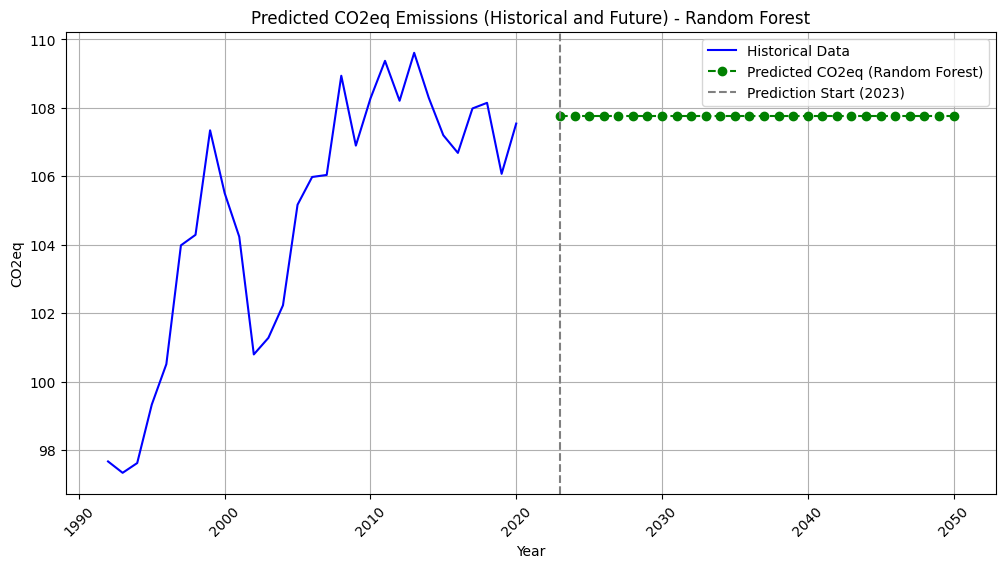

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'co2eq_mean' contains the historical CO2eq emissions data
# Ensure that 'Year' is the index
co2eq_mean.index = pd.to_datetime(co2eq_mean.index, format='%Y')

# Split the data into historical and future parts
historical_data = co2eq_mean[co2eq_mean.index.year <= 2020]
future_years = range(2023, 2051)  # Specify the range of future years you want to predict

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Split the historical data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    np.array(historical_data.index.year).reshape(-1, 1),
    historical_data.values,
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) on the test set
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score on the test set
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE) on Test Data: {mae}')
print(f'Mean Squared Error (MSE) on Test Data: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse}')
print(f'R-squared (R2) Score on Test Data: {r2}')

# Predict future values
X_future = np.array(list(future_years)).reshape(-1, 1)
future_predictions = model.predict(X_future)

# Create a DataFrame to store the predictions
future_predictions_df = pd.Series(future_predictions, index=future_years, name='Predicted CO2eq')

# Create a plot to visualize the predicted values
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index.year, historical_data.values, label='Historical Data', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df.values, color='green', marker='o', label='Predicted CO2eq (Random Forest)', linestyle='dashed')
plt.axvline(x=2023, color='gray', linestyle='--', label='Prediction Start (2023)')
plt.xlabel('Year')
plt.ylabel('CO2eq')
plt.xticks(rotation=45)
plt.legend()
plt.title('Predicted CO2eq Emissions (Historical and Future) - Random Forest')
plt.grid(True)
plt.show()


Mean Absolute Error (MAE) on Test Data: 2.062023498241892
Mean Squared Error (MSE) on Test Data: 4.991775832335699
Root Mean Squared Error (RMSE) on Test Data: 2.234228240877753
R-squared (R2) Score on Test Data: 0.04491517391683009


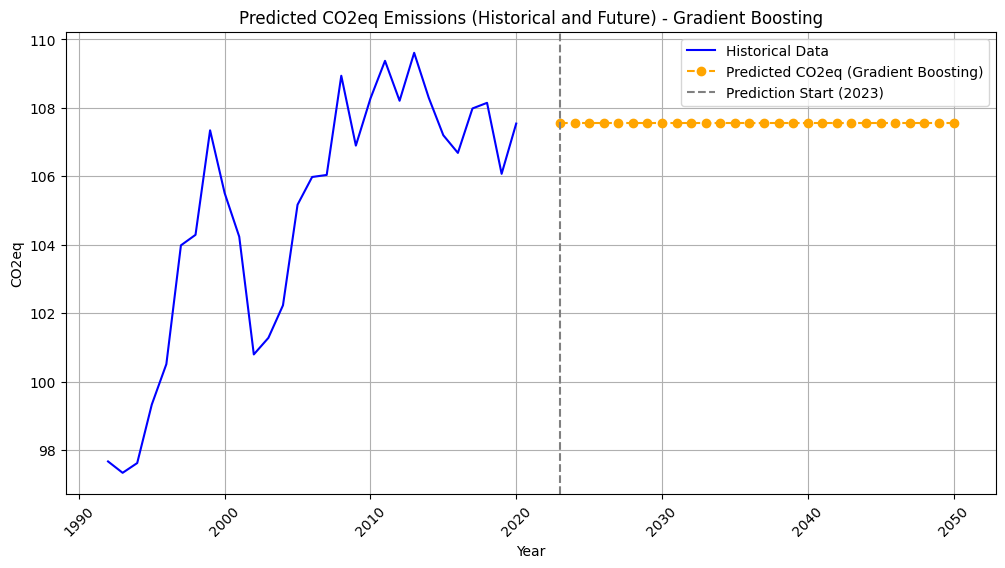

In [23]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'co2eq_mean' contains the historical CO2eq emissions data
# Ensure that 'Year' is the index
co2eq_mean.index = pd.to_datetime(co2eq_mean.index, format='%Y')

# Split the data into historical and future parts
historical_data = co2eq_mean[co2eq_mean.index.year <= 2020]
future_years = range(2023, 2051)  # Specify the range of future years you want to predict

# Create a Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Split the historical data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    np.array(historical_data.index.year).reshape(-1, 1),
    historical_data.values,
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) on the test set
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score on the test set
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE) on Test Data: {mae}')
print(f'Mean Squared Error (MSE) on Test Data: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse}')
print(f'R-squared (R2) Score on Test Data: {r2}')

# Predict future values
X_future = np.array(list(future_years)).reshape(-1, 1)
future_predictions = model.predict(X_future)

# Create a DataFrame to store the predictions
future_predictions_df = pd.Series(future_predictions, index=future_years, name='Predicted CO2eq')

# Create a plot to visualize the predicted values
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index.year, historical_data.values, label='Historical Data', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df.values, color='orange', marker='o', label='Predicted CO2eq (Gradient Boosting)', linestyle='dashed')
plt.axvline(x=2023, color='gray', linestyle='--', label='Prediction Start (2023)')
plt.xlabel('Year')
plt.ylabel('CO2eq')
plt.xticks(rotation=45)
plt.legend()
plt.title('Predicted CO2eq Emissions (Historical and Future) - Gradient Boosting')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

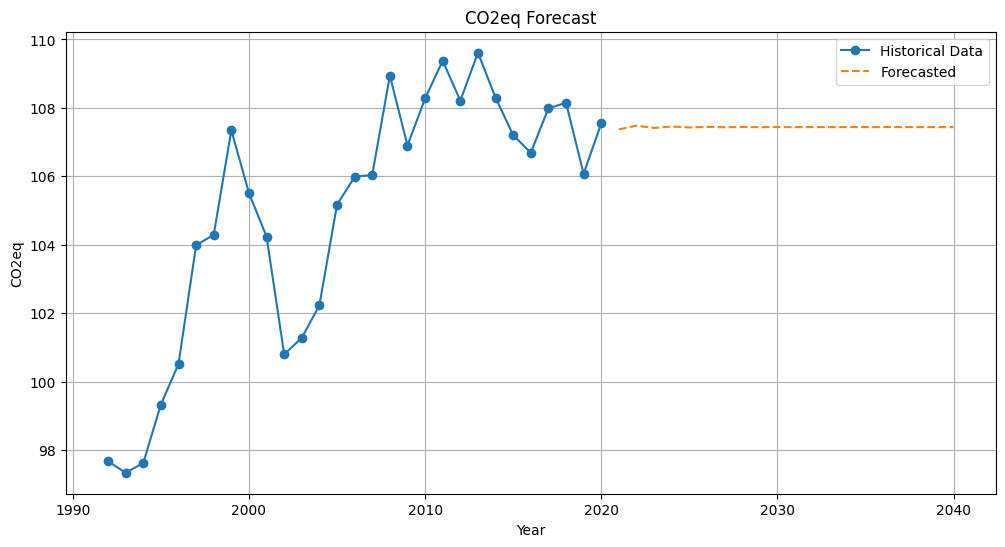

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast future values using ARIMA
def forecast_arima(data):
    # Prepare the time series data (Year as the index and CO2eq as the values)
    time_series = data.set_index('Year')['CO2eq']

    # Fit an ARIMA model
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future values (adjust the steps parameter as needed)
    steps = 20  # Number of future steps to predict
    forecast_values = model_fit.forecast(steps=steps)

    # Create a DataFrame for the forecasted values
    future_years = np.arange(time_series.index[-1] + 1, time_series.index[-1] + steps + 1)
    forecast_df = pd.DataFrame({'Year': future_years, 'CO2eq': forecast_values})

    return forecast_df

# Perform the forecasting for the provided dataset
forecasted_df = forecast_arima(co2eq_df)

# Plot the historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2eq_df['Year'], co2eq_df['CO2eq'], label='Historical Data', marker='o')
plt.plot(forecasted_df['Year'], forecasted_df['CO2eq'], label='Forecasted', linestyle='--')

plt.title('CO2eq Forecast')
plt.xlabel('Year')
plt.ylabel('CO2eq')
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error (MAE) on Test Data: 1.304002286936317
Mean Squared Error (MSE) on Test Data: 2.6453058472555067
Root Mean Squared Error (RMSE) on Test Data: 1.6264396229972715
R-squared (R2) Score on Test Data: 0.4938692040822976


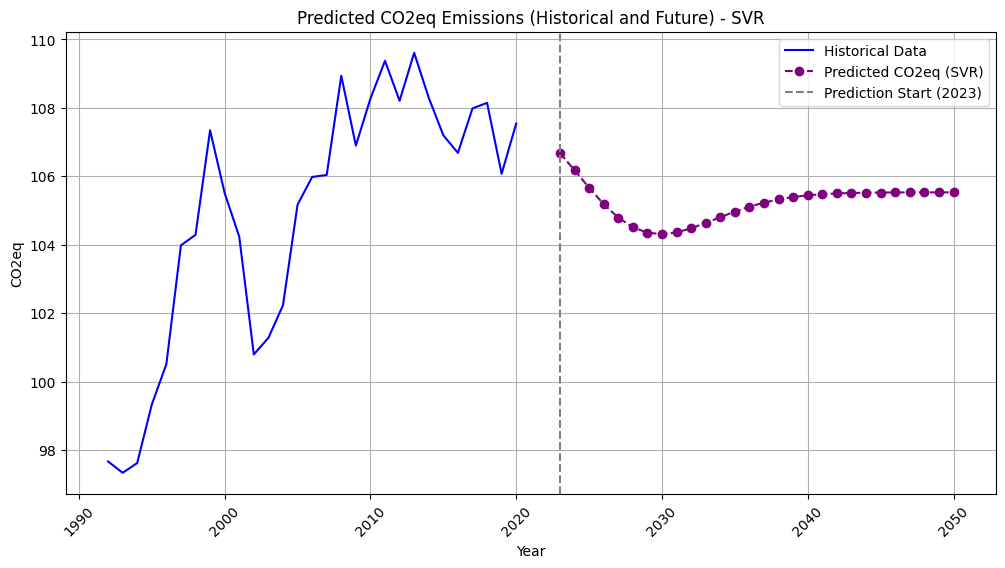

In [25]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'co2eq_mean' contains the historical CO2eq emissions data
# Ensure that 'Year' is the index
co2eq_mean.index = pd.to_datetime(co2eq_mean.index, format='%Y')

# Split the data into historical and future parts
historical_data = co2eq_mean[co2eq_mean.index.year <= 2020]
future_years = range(2023, 2051)  # Specify the range of future years you want to predict

# Create an SVR model
model = SVR(kernel='rbf', C=100, gamma='scale')  # Adjust parameters as needed

# Split the historical data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    np.array(historical_data.index.year).reshape(-1, 1),
    historical_data.values,
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) on the test set
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score on the test set
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE) on Test Data: {mae}')
print(f'Mean Squared Error (MSE) on Test Data: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse}')
print(f'R-squared (R2) Score on Test Data: {r2}')

# Predict future values
X_future = np.array(list(future_years)).reshape(-1, 1)
future_predictions = model.predict(X_future)

# Create a DataFrame to store the predictions
future_predictions_df = pd.Series(future_predictions, index=future_years, name='Predicted CO2eq')

# Create a plot to visualize the predicted values
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index.year, historical_data.values, label='Historical Data', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df.values, color='purple', marker='o', label='Predicted CO2eq (SVR)', linestyle='dashed')
plt.axvline(x=2023, color='gray', linestyle='--', label='Prediction Start (2023)')
plt.xlabel('Year')
plt.ylabel('CO2eq')
plt.xticks(rotation=45)
plt.legend()
plt.title('Predicted CO2eq Emissions (Historical and Future) - SVR')
plt.grid(True)
plt.show()


Mean Absolute Error (MAE) on Test Data: 2.2638717011580005
Mean Squared Error (MSE) on Test Data: 6.50043350574353
Root Mean Squared Error (RMSE) on Test Data: 2.5495947728498995
R-squared (R2) Score on Test Data: -0.24373882418379167


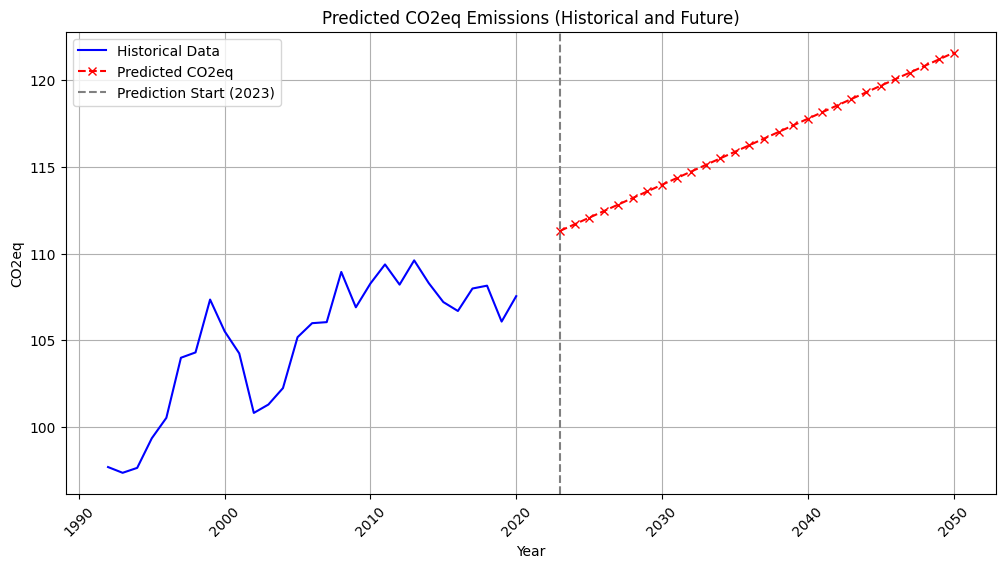

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'co2eq_mean' contains the historical CO2eq emissions data
# Ensure that 'Year' is the index
co2eq_mean.index = pd.to_datetime(co2eq_mean.index, format='%Y')

# Split the data into historical and future parts
historical_data = co2eq_mean[co2eq_mean.index.year <= 2020]
future_years = range(2023, 2051)  # Specify the range of future years you want to predict

# Create a linear regression model
model = LinearRegression()

# Split the historical data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    np.array(historical_data.index.year).reshape(-1, 1),
    historical_data.values,
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) on the test set
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score on the test set
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE) on Test Data: {mae}')
print(f'Mean Squared Error (MSE) on Test Data: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse}')
print(f'R-squared (R2) Score on Test Data: {r2}')

# Predict future values
X_future = np.array(list(future_years)).reshape(-1, 1)
future_predictions = model.predict(X_future)

# Create a DataFrame to store the predictions
future_predictions_df = pd.Series(future_predictions, index=future_years, name='Predicted CO2eq')

# Create a plot to visualize the predicted values
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index.year, historical_data.values, label='Historical Data', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df.values, color='red', marker='x', label='Predicted CO2eq', linestyle='dashed')
plt.axvline(x=2023, color='gray', linestyle='--', label='Prediction Start (2023)')
plt.xlabel('Year')
plt.ylabel('CO2eq')
plt.xticks(rotation=45)
plt.legend()
plt.title('Predicted CO2eq Emissions (Historical and Future)')
plt.grid(True)
plt.show()
